<div style=" background-color: RGB(9, 121, 105);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie</h2>
</div>

<div style=" background-color: RGB(51, 153, 102);" >
<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">I - Nettoyage</h2>
</div>

<div style=" background-color: RGB(51, 153, 102);" >
<div style="border: 1px solid RGB(34, 139, 34);" >
<h3 style="margin: auto; padding: 20px; color: #fff"> Chargement des fichiers CSV</h3>
</div>

In [2]:
# Importation du fichier clients non nettoyé
customers_raw = pd.read_csv('customers_raw.csv')
# Importation du fichier produits non nettoyé
products_raw = pd.read_csv('products_raw.csv')
# Improtation du fichier transactions non nettoyé
transactions_raw = pd.read_csv('transactions_raw.csv')

In [3]:
### fonction pour decrire les tables
def descr_table(data) :
    print('Le fichier clients comporte {} observation(s) ou article(s).'
      .format(data.shape[0]))
    print('Le fichier clients comporte {} colonne(s).'
      .format(data.shape[1]))
    print(data.nunique())

### Table Clients

In [4]:
# Contrôler la dimension du fichier clients
descr_table(customers_raw)

Le fichier clients comporte 8623 observation(s) ou article(s).
Le fichier clients comporte 3 colonne(s).
client_id    8623
sex             2
birth          76
dtype: int64


In [5]:
# Vérifier si les entrées de la variable sexe ne comportent pas d'erreurs
customers_raw.sex.value_counts()

f    4491
m    4132
Name: sex, dtype: int64

### Table Produits

In [6]:
# Contrôler la dimension du fichier products
descr_table(products_raw)

Le fichier clients comporte 3287 observation(s) ou article(s).
Le fichier clients comporte 3 colonne(s).
id_prod    3287
price      1455
categ         3
dtype: int64


In [7]:
# Info générales de la variable prix
products_raw.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [8]:
print('On remarque qu\'une valeur est négative')

On remarque qu'une valeur est négative


In [9]:
products_raw.sort_values(by = 'price')

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [10]:
transactions_raw.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

### Table Transactions

In [11]:
# Contrôler la dimension du fichier transactions
descr_table(transactions_raw)

Le fichier clients comporte 679532 observation(s) ou article(s).
Le fichier clients comporte 4 colonne(s).
id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64


In [12]:
# Trier le fichier transactions par session_id
transactions_raw.sort_values(by='session_id').head(20)

,id_prod,date,session_id,client_id
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
561543,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_1
634523,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_0
295782,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1
237649,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
589180,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
459137,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
366923,T_0,test_2021-03-01 02:30:02.237428,s_0,ct_0
640484,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
561773,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0


On constate que les transactions de la session s_0 correspondent a un test effectué à la même date et heure.
Les clients ct_0 et ct_1 sont fictifs ainsi que le produit T_0, qui est lié au prix négatif observé plus tôt.

In [13]:
# Checker les lignes de la transactions de la session s_0
transactions_raw.loc[(transactions_raw['session_id'] == 's_0' )].sort_values(by = 'client_id').head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
481737,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
321268,T_0,test_2021-03-01 02:30:02.237440,s_0,ct_0
482523,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
487726,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0


In [14]:
# Checker les lignes de transactions par rapport au produit test T_0
transactions_raw.loc[(transactions_raw['id_prod'] == 'T_0' )].sort_values(by = 'client_id').head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
481737,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
321268,T_0,test_2021-03-01 02:30:02.237440,s_0,ct_0
482523,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
487726,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0


In [15]:
# Checker les lignes de transactions par rapport aux id clients tests ct_1 et ct_0
transactions_raw.loc[(transactions_raw['client_id'] == 'ct_1') 
                 | (transactions_raw['client_id'] == 'ct_0')].sort_values(by = 'client_id').head()

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
481737,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
321268,T_0,test_2021-03-01 02:30:02.237440,s_0,ct_0
482523,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
487726,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0


### Enlever les données Test dans les 3 tables

In [16]:
# Stocker les transactions "test"
test = transactions_raw.loc[(transactions_raw['client_id'] == 'ct_1') 
                 | (transactions_raw['client_id'] == 'ct_0')].sort_values(by = 'client_id')

# Supprimer les transactions "test" du dataframe
transactions_raw.drop(transactions_raw[(transactions_raw['session_id'] == 's_0')].index, inplace=True)

In [17]:
# Stocker le produit test
produit_test = products_raw.loc[(products_raw['id_prod'] == 'T_0')]

# Supprimer la ligne correspondant au produit test du df
products_raw.drop(products_raw[(products_raw['id_prod'] == 'T_0')].index, 
              inplace=True)

In [18]:
# Stocker les clients test
customer_test = customers_raw.loc[(customers_raw['client_id'] == 'ct_1') 
                 | (customers_raw['client_id'] == 'ct_0')].sort_values(by = 'client_id')

# Supprimer les clients tests du df
customers_raw.drop(customers_raw[(customers_raw['client_id'] == 'ct_1') 
                 | (customers_raw['client_id'] == 'ct_0')].index, 
              inplace=True)

In [19]:
### Vérification des NA
print(customers_raw.isnull().values.any())
print(products_raw.isnull().values.any())
print(transactions_raw.isnull().values.any())

False
False
False


In [20]:
# Calculer l'âge des clients
customers_age = customers_raw.assign(age = 2023 - customers_raw.birth)

In [21]:
transactions_raw.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">II - Jointure</h2>
</div>

## Jointure entre clients et transactions

In [22]:
# Jointure entre customers et transactions
customers_transactions= pd.merge(customers_age, 
                        transactions_raw, 
                        how="outer", 
                        on=('client_id'),
                        indicator = True)

In [23]:
customers_transactions_left_only = customers_transactions.loc[customers_transactions["_merge"] == "left_only"]
print('Ci-dessous, la liste des clients qui n\'ont jamais effectués d\'achats sur le site, dont',
       customers_transactions_left_only.client_id.nunique(),'clients unique.')
customers_transactions_left_only

Ci-dessous, la liste des clients qui n'ont jamais effectués d'achats sur le site, dont 21 clients unique.


,client_id,sex,birth,age,id_prod,date,session_id,_merge
59493,c_8253,f,2001,22,NaN,NaN,NaN,left_only
200286,c_3789,f,1997,26,NaN,NaN,NaN,left_only
218173,c_4406,f,1998,25,NaN,NaN,NaN,left_only
220388,c_2706,f,1967,56,NaN,NaN,NaN,left_only
225538,c_3443,m,1959,64,NaN,NaN,NaN,left_only
248409,c_4447,m,1956,67,NaN,NaN,NaN,left_only
248965,c_3017,f,1992,31,NaN,NaN,NaN,left_only
261024,c_4086,f,1992,31,NaN,NaN,NaN,left_only
313133,c_6930,m,2004,19,NaN,NaN,NaN,left_only
319727,c_4358,m,1999,24,NaN,NaN,NaN,left_only


In [24]:
customers_transactions_right_only = customers_transactions.loc[customers_transactions["_merge"] == "right_only"].reset_index()
print('En toute logique, il n\'y a aucun résultat ici car un client ne peut pas acheter sans compte affilié et donc id.')
customers_transactions_right_only

En toute logique, il n'y a aucun résultat ici car un client ne peut pas acheter sans compte affilié et donc id.


,index,client_id,sex,birth,age,id_prod,date,session_id,_merge


In [25]:
customers_transactions_both = customers_transactions.loc[customers_transactions["_merge"] == "both"]
customers_transactions_both

,client_id,sex,birth,age,id_prod,date,session_id,_merge
0,c_4410,f,1967,56,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,56,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,56,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,56,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,56,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...,...
679348,c_84,f,1982,41,0_1438,2022-05-29 06:11:50.316631,s_215697,both
679349,c_84,f,1982,41,0_1020,2021-10-21 03:52:13.863959,s_107849,both
679350,c_84,f,1982,41,0_1399,2021-10-01 16:13:18.997813,s_98493,both
679351,c_84,f,1982,41,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [26]:
# Supprimer colonne "_merge" du df customers_transactions_both
customers_transactions_both.drop(['_merge'], axis=1, inplace = True)

C:\Users\pauli\AppData\Local\Temp\ipykernel_20256\558464177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_transactions_both.drop(['_merge'], axis=1, inplace = True)


## Jointure avec produits

In [27]:
# Jointure entre products et transactions
data_melted = pd.merge(products_raw, 
                        customers_transactions_both, 
                        how="outer", 
                        on=('id_prod'),
                       indicator = True)

### Le produit 0_2245 manquant

#### jointure right_only

In [28]:
data_melted_right_only = data_melted.loc[data_melted["_merge"] == "right_only"]
print('Un article ne fait pas partie du fichier products ', data_melted_right_only.id_prod.unique(), '\n')
data_melted_right_only.head()


Un article ne fait pas partie du fichier products  ['0_2245'] 



,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
679132,0_2245,NaN,NaN,c_4505,m,1976.0,47.0,2022-01-09 09:23:31.000720,s_147220,right_only
679133,0_2245,NaN,NaN,c_4505,m,1976.0,47.0,2022-11-09 09:23:31.000720,s_295013,right_only
679134,0_2245,NaN,NaN,c_3468,f,1981.0,42.0,2021-09-11 10:52:05.205583,s_88251,right_only
679135,0_2245,NaN,NaN,c_3468,f,1981.0,42.0,2022-05-11 10:52:05.205583,s_206902,right_only
679136,0_2245,NaN,NaN,c_1403,f,1978.0,45.0,2022-09-15 14:26:50.187952,s_268455,right_only


In [29]:
print('Le Produit 0_2245 représente', round((len(data_melted_right_only) / len(data_melted) * 100), 2), '% du dataset,'
      ' on choisi donc de ne pas garder ces lignes pour ne pas fausser l\'analyse.')

Le Produit 0_2245 représente 0.03 % du dataset, on choisi donc de ne pas garder ces lignes pour ne pas fausser l'analyse.


#### jointure only_left

In [30]:
data_melted_left_only = data_melted.loc[data_melted["_merge"] == "left_only"]
print('21 articles n\'ont jamais été vendus, dont', data_melted_left_only.id_prod.nunique(), 'articles unique.')
data_melted_left_only

21 articles n'ont jamais été vendus, dont 21 articles unique.


,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
162765,0_1062,20.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
177522,0_1119,2.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
181172,0_1014,1.15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
188021,1_0,31.82,1.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
230468,0_1318,20.92,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
253465,0_1800,22.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
290409,0_1645,2.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
320861,0_322,2.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only


#### merge_jointure

In [31]:
data_merge = data_melted.loc[data_melted["_merge"] == "both"].reset_index()
data_merge.head()

,index,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
0,0,0_1421,19.99,0.0,c_5152,f,1986.0,37.0,2021-04-17 06:09:37.424812,s_21727,both
1,1,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2021-11-24 00:28:06.088699,s_124134,both
2,2,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2022-08-24 00:28:06.088699,s_257560,both
3,3,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2021-04-06 09:35:05.954975,s_16742,both
4,4,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2022-03-06 09:35:05.954975,s_175117,both


In [32]:
# Supprimer colonne "_merge" du df data_melted_both
data_merge.drop(['_merge'], axis=1, inplace = True)
data_merge.reset_index(inplace = True)
data_merge.drop(['level_0', 'index'], axis=1, inplace = True)

<div style="background-color: RGB(11, 83, 69);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">III - Données manquantes </h2>
</div>

In [33]:
data_merge.head()

,id_prod,price,categ,client_id,sex,birth,age,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986.0,37.0,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2022-08-24 00:28:06.088699,s_257560
3,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2021-04-06 09:35:05.954975,s_16742
4,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2022-03-06 09:35:05.954975,s_175117


### Vérifier s'il y a des données manquantes

In [34]:
### on transforme la date
from datetime import datetime as dt
data_merge.date = pd.to_datetime(data_merge.date.str[:10])
data_merge['mois_trans'] = data_merge.date.dt.strftime('%Y-%m')

In [35]:
data_merge

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,mois_trans
0,0_1421,19.99,0.0,c_5152,f,1986.0,37.0,2021-04-17,s_21727,2021-04
1,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2021-11-24,s_124134,2021-11
2,0_1421,19.99,0.0,c_2167,f,1960.0,63.0,2022-08-24,s_257560,2022-08
3,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2021-04-06,s_16742,2021-04
4,0_1421,19.99,0.0,c_3060,m,1971.0,52.0,2022-03-06,s_175117,2022-03
...,...,...,...,...,...,...,...,...,...,...
679106,1_140,38.56,1.0,c_7406,m,1988.0,35.0,2021-12-09,s_131828,2021-12
679107,0_1920,25.16,0.0,c_7748,f,1989.0,34.0,2023-01-30,s_334324,2023-01
679108,0_1920,25.16,0.0,c_7748,f,1989.0,34.0,2021-05-30,s_41465,2021-05
679109,0_1920,25.16,0.0,c_7748,f,1989.0,34.0,2022-12-30,s_319303,2022-12


In [36]:
# Calcul CA mensuel par categ
data_price = data_merge.groupby(['categ', 'mois_trans']).agg(
    total_price=('price', 'sum')
).reset_index()
data_price = data_price.astype({'categ': str})
data_price

,categ,mois_trans,total_price
0,0.0,2021-03,193629.17
1,0.0,2021-04,205222.46
2,0.0,2021-05,196186.72
3,0.0,2021-06,167943.15
4,0.0,2021-07,144750.79
...,...,...,...
67,2.0,2022-10,120878.94
68,2.0,2022-11,111642.60
69,2.0,2022-12,123803.09
70,2.0,2023-01,126153.08


In [37]:
# Contrôler nombre de categ
data_price.categ.unique()

array(['0.0', '1.0', '2.0'], dtype=object)

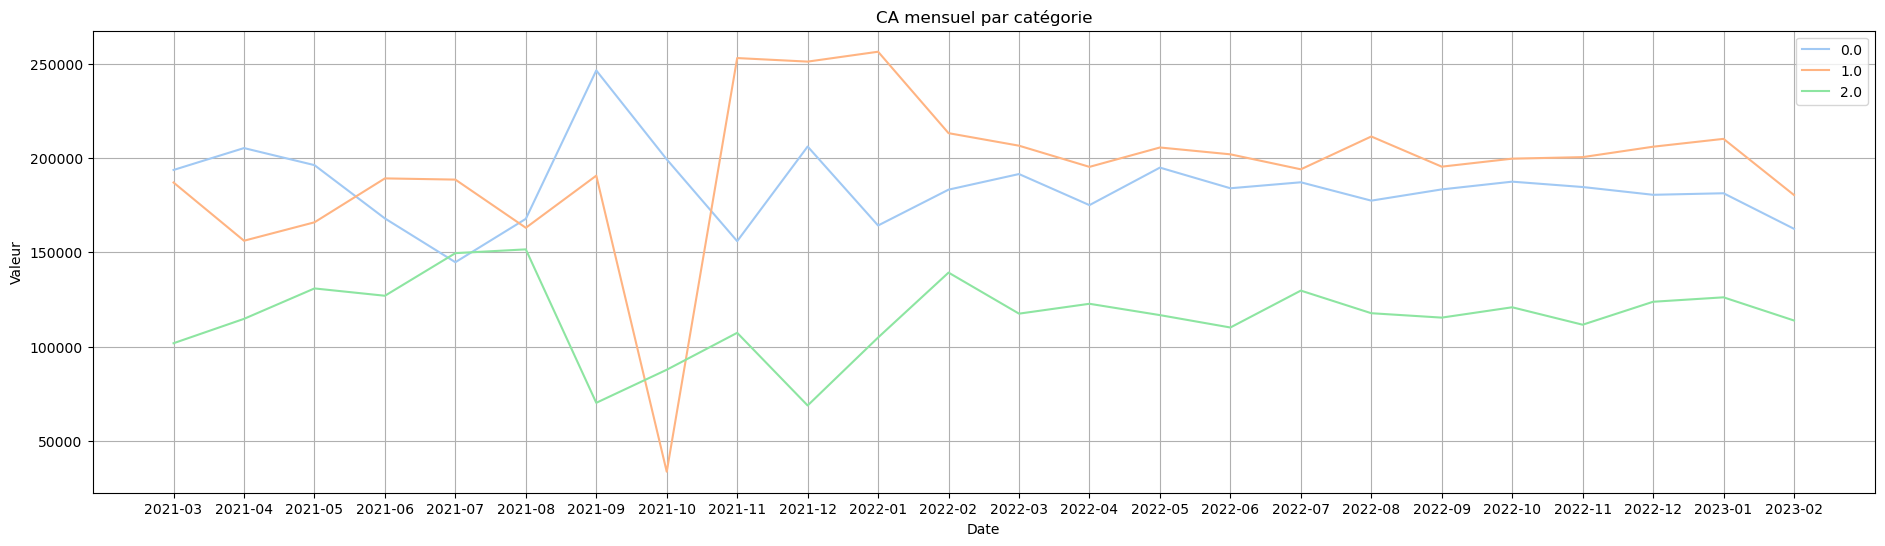

In [38]:
# Représenter une série temporelle du CA mensuel par catégorie
plt.figure(figsize=(23, 6))
sns.lineplot(data=data_price, x='mois_trans', y='total_price', hue='categ',
    palette = "pastel", legend='auto'
).set(title = 'CA mensuel par catégorie')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.savefig('missing_data_oct.png', dpi=300, bbox_inches='tight')
plt.show()

On a l'impression que les données de la catégorie 1 sont manquantes sur la date 2021-10. 

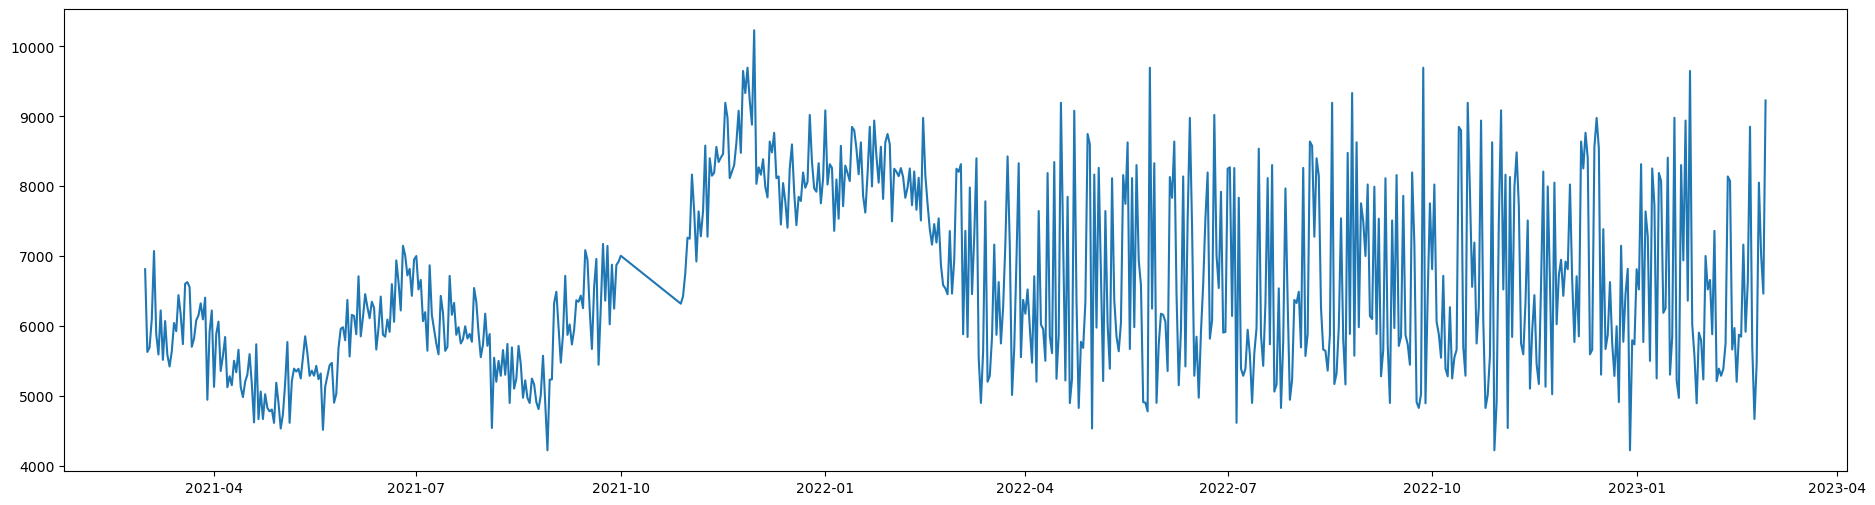

In [39]:
# Visualiser et stocker les données transactions pour la categ 1
categ1_jour = data_merge[data_merge.categ==1.0].groupby(['categ', 'date', 'mois_trans']).agg(total_price = ('price', 'sum')).reset_index()
plt.figure(figsize=(23, 6))
plt.plot(categ1_jour["date"], categ1_jour["total_price"])

In [40]:
# Voir les données d'Octobre 2021 pour la catégorie 1
categ1_jour[categ1_jour.mois_trans=="2021-10"]

,categ,date,mois_trans,total_price
214,1.0,2021-10-01,2021-10,7003.79
215,1.0,2021-10-28,2021-10,6317.99
216,1.0,2021-10-29,2021-10,6425.18
217,1.0,2021-10-30,2021-10,6753.69
218,1.0,2021-10-31,2021-10,7261.67


Nous ne disposons que de 5 jours de ventes pour Octobre 2021 pour la catégorie 1.

### Imputation des données du mois d'octobre 2021

In [41]:
# Calcul du chiffre d’affaires mensuel
ca_mensuel = data_merge.groupby(['mois_trans']).sum().reset_index()
ca_mensuel.sort_values(by='price')
ca_mensuel = ca_mensuel[['mois_trans','price']]
ca_mensuel

C:\Users\pauli\AppData\Local\Temp\ipykernel_20256\937738674.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_mensuel = data_merge.groupby(['mois_trans']).sum().reset_index()


,mois_trans,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


In [42]:
# Imputation données Octobre 2021 - CA mensuel
ca_2021_oct = ca_mensuel.loc[:9]
octobre = ca_2021_oct['price'][7]

# Suppression de la donnée présente dans la BDD afin que le calcul de la moyenne ne s'en trouve pas impactée
ca_2021_oct = ca_2021_oct.replace(octobre,0)

# Division de la somme des CA mensuel par 9 pour écarter le mois d'octobre qui fausserait le résultat
moy_ca_2021 = (ca_2021_oct.price.sum())/9 

print('Le CA d\'octobre 2021, determiné par la technique '
      'd\'imputation par la moyenne s\'élève à', round(moy_ca_2021,0),'euros.')

# Imputation du CA mensuel d'Octobre 2021 
a = ca_mensuel['price'][7]
b = moy_ca_2021
ca_mensuel_imput = ca_mensuel.replace(a,b)

Le CA d'octobre 2021, determiné par la technique d'imputation par la moyenne s'élève à 494448.0 euros.


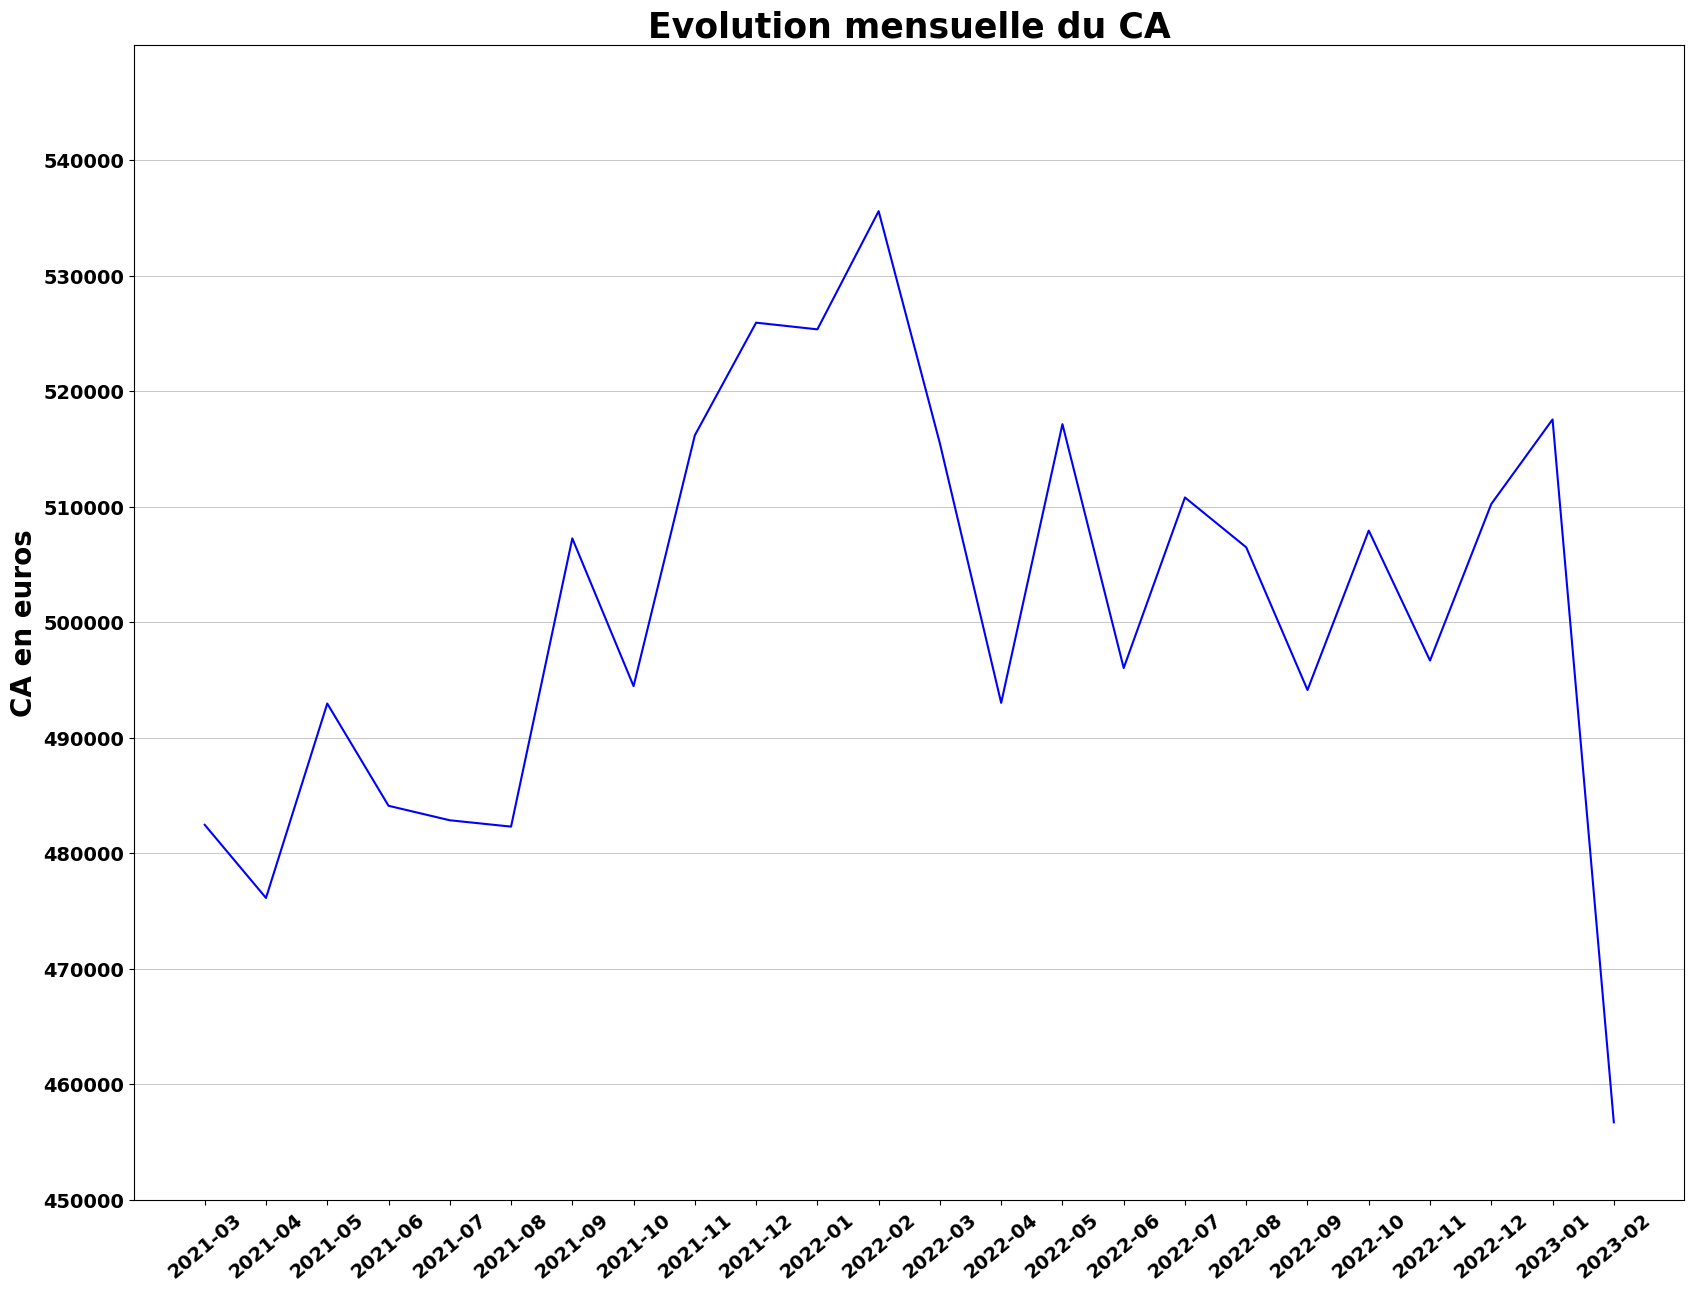

In [43]:
# Figure : Evolution du CA mensuel avec imputation des données sur Octobre 2021
plt.figure(figsize=(20, 15))
plt.title('Evolution mensuelle du CA', fontsize=25, fontweight='bold')
plt.ylabel('CA en euros', fontsize=20, fontweight='bold')
plt.ylim(450_000, 550_000)
plt.yticks(np.arange(450_000, 550_000, step=10_000), fontweight = 'bold', fontsize = 14)
plt.xticks(rotation = 40, fontweight = 'bold', fontsize = 14)
plt.grid(axis='y',linewidth = 0.5)

plt.plot(ca_mensuel_imput['mois_trans'], ca_mensuel_imput['price'], color = 'blue')

plt.show()

Pour la partie analyse, on utilisera les données nettoyées fournies par OC.